In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# load tensorboard visualization tool
%load_ext tensorboard

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import datetime, os
from tensorflow import keras
from tensorflow.keras import layers


# set the float print only 4 decimal 
np.set_printoptions(precision=4)

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# set each data between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)

(60000, 28, 28)


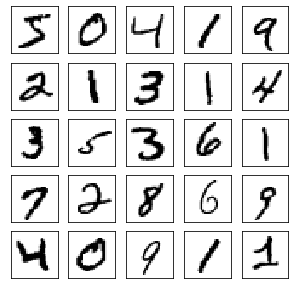

In [3]:
# print first 25 handwriting picture
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
# Create tensorboard meta data
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [5]:
'''
  Initialize layers parameter
'''

def build_model():
    # Here layers.Dense(10,...). 10 means the output will be a list of 10
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(10, activation = 'sigmoid', input_dim = x_train.shape[1], use_bias=True)
    ])

    optimizer = tf.keras.optimizers.SGD(0.001)

    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

    return model

model = build_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
'''
  Train the model
'''

EPOCHS = 10

# The param"verbose": Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, verbose=2,
  callbacks=[tensorboard_callback])


Train on 60000 samples
Epoch 1/10
60000/60000 - 8s - loss: 2.0955 - accuracy: 0.3453
Epoch 2/10
60000/60000 - 6s - loss: 1.6738 - accuracy: 0.6803
Epoch 3/10
60000/60000 - 6s - loss: 1.2914 - accuracy: 0.7783
Epoch 4/10
60000/60000 - 7s - loss: 1.0457 - accuracy: 0.8123
Epoch 5/10
60000/60000 - 7s - loss: 0.8948 - accuracy: 0.8295
Epoch 6/10
60000/60000 - 7s - loss: 0.7960 - accuracy: 0.8408
Epoch 7/10
60000/60000 - 7s - loss: 0.7269 - accuracy: 0.8485
Epoch 8/10
60000/60000 - 7s - loss: 0.6760 - accuracy: 0.8541
Epoch 9/10
60000/60000 - 7s - loss: 0.6368 - accuracy: 0.8587
Epoch 10/10
60000/60000 - 7s - loss: 0.6057 - accuracy: 0.8626


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.4773 - accuracy: 0.8727

Test accuracy: 0.8727


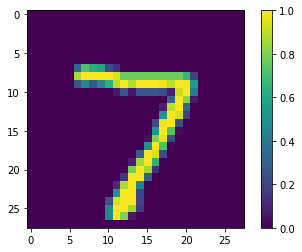

In [8]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Get model predict result base on x_test data
predictions = model.predict(x_test)

In [10]:
num_probability = predictions[0]
highest_prob_index = np.argmax(num_probability)
true_result_index = y_test[0]
print("Guess number: ", highest_prob_index)
print("True value: ", true_result_index)

Guess number:  7
True value:  7


In [11]:
'''
 Helper function: print the prediction result and probability chart
 Ref: https://www.tensorflow.org/tutorials/keras/classification
'''
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label, img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


7


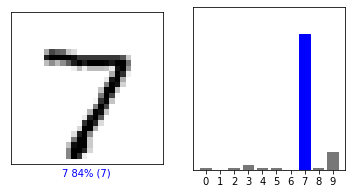

In [12]:
i = 0
print(y_test[i])
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test[i], x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test[i])
plt.show()

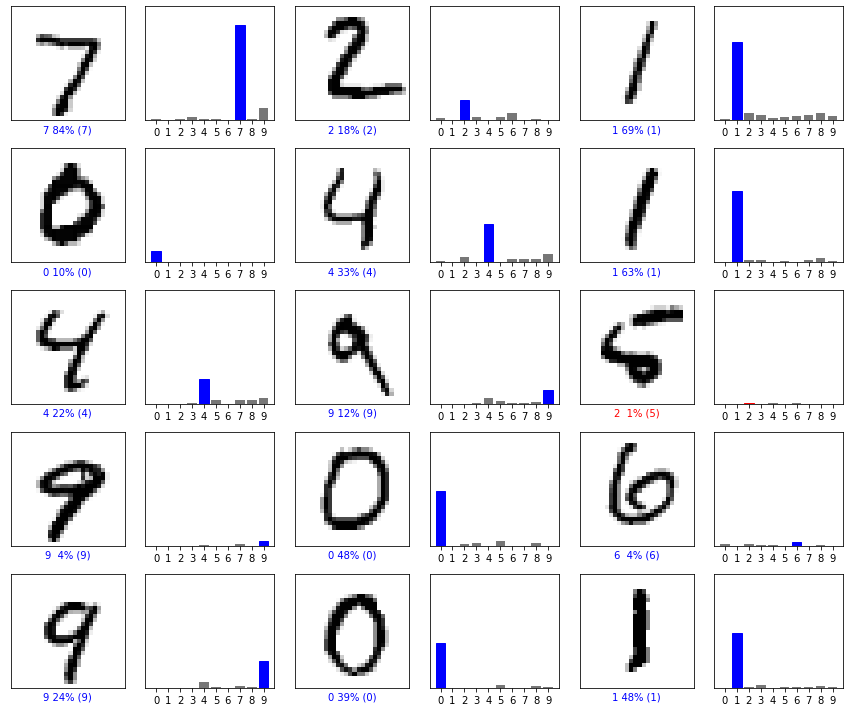

In [13]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test[i], x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test[i])
plt.tight_layout()
plt.show()